In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [12]:
#DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
#DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

In [13]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.041773,0.066211,4128.005439
2017-09-13 02:00:00,0.051911,0.089798,4066.801167
2017-09-13 03:00:00,0.027604,0.052726,3999.225167
2017-09-13 04:00:00,0.018836,0.042056,3959.409667
2017-09-13 05:00:00,0.076571,0.109514,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.030288,0.050931,3584.926897
2019-01-22 19:00:00,0.025549,0.053502,3585.858545
2019-01-22 20:00:00,0.028746,0.057698,3585.295893
2019-01-22 21:00:00,0.034695,0.073557,3579.910755


#### Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [14]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [5]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


KeyboardInterrupt: 

In [ ]:
plt.plot(cash)

In [ ]:
np.min(df['Bitcoin'].values)

In [16]:
signal = Signal2(df['Bitcoin'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df['Open'], strategy)
#algo.set_stoploss(0.01)

algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


selling  10000.000000000005  BTC at  4066.801166666666  $
closing  -10000.000000000005  BTC at  3999.2251666666666  $
buying  12865.729429336257  BTC at  3999.2251666666666  $
closing  12865.729429336257  BTC at  3995.046666666667  $
selling  16499.72438064325  BTC at  3995.046666666667  $
closing  -16499.72438064325  BTC at  4005.1322641509432  $
selling  6995.407217255767  BTC at  4005.1322641509432  $
closing  -6995.407217255767  BTC at  3982.99  $
selling  13116.624923094252  BTC at  3982.99  $
closing  -13116.624923094252  BTC at  3969.537118644068  $
buying  1962.886075368145  BTC at  3969.537118644068  $
closing  1962.886075368145  BTC at  3839.3781666666655  $
buying  21866.048244539354  BTC at  3839.3781666666655  $
closing  21866.048244539354  BTC at  3833.9163333333327  $
buying  3574.264057063736  BTC at  3833.9163333333327  $
closing  3574.264057063736  BTC at  3868.011  $
buying  1977.208817902875  BTC at  3868.011  $
closing  1977.208817902875  BTC at  3794.985666666667 

closing  -16527.91644767631  BTC at  6094.0425  $
buying  9342.961632061251  BTC at  6094.0425  $
closing  9342.961632061251  BTC at  6104.586166666664  $
buying  4529.41638681396  BTC at  6104.586166666664  $
closing  4529.41638681396  BTC at  6139.857000000002  $
selling  10401.049879086624  BTC at  6139.857000000002  $
closing  -10401.049879086624  BTC at  6146.445166666667  $
selling  16247.534364567471  BTC at  6146.445166666667  $
closing  -16247.534364567471  BTC at  5995.315333333333  $
buying  12402.209173310473  BTC at  5995.315333333333  $
closing  12402.209173310473  BTC at  6008.0275  $
buying  890.5178992519964  BTC at  6008.0275  $
closing  890.5178992519964  BTC at  6032.384666666667  $
buying  2264.6736766528898  BTC at  6032.384666666667  $
closing  2264.6736766528898  BTC at  6083.566833333333  $
selling  7698.398820568131  BTC at  6083.566833333333  $
closing  -7698.398820568131  BTC at  6090.522000000001  $
selling  2382.874827559633  BTC at  6090.522000000001  $
c

closing  -10298.064353643416  BTC at  11608.903666666669  $
selling  12.222429320245144  BTC at  11608.903666666669  $
closing  -12.222429320245144  BTC at  11139.041833333333  $
selling  6218.569431410204  BTC at  11139.041833333333  $
closing  -6218.569431410204  BTC at  11149.956333333335  $
buying  4917.615428249791  BTC at  11149.956333333335  $
closing  4917.615428249791  BTC at  11149.956333333335  $
buying  9999.999999999985  BTC at  16065.750333333332  $
closing  9999.999999999985  BTC at  16214.115833333335  $
selling  13443.872261290458  BTC at  16214.115833333335  $
closing  -13443.872261290458  BTC at  16208.816666666668  $
selling  2985.625491935023  BTC at  16208.816666666668  $
closing  -2985.625491935023  BTC at  16626.591186440677  $
buying  10352.920799830223  BTC at  16626.591186440677  $
closing  10352.920799830223  BTC at  16482.85159090909  $
buying  16838.080220613847  BTC at  16482.85159090909  $
closing  16838.080220613847  BTC at  16442.60816666667  $
buying 

closing  -2770.97679077119  BTC at  7840.150666666667  $
buying  12369.877916933969  BTC at  7840.150666666667  $
closing  12369.877916933969  BTC at  7778.342333333334  $
selling  11132.768875417603  BTC at  7778.342333333334  $
closing  -11132.768875417603  BTC at  7910.0971666666655  $
buying  4832.371987125108  BTC at  7910.0971666666655  $
closing  4832.371987125108  BTC at  7957.139333333333  $
buying  21951.16494064803  BTC at  7957.139333333333  $
closing  21951.16494064803  BTC at  8216.866499999998  $
selling  8075.636631725962  BTC at  8216.866499999998  $
closing  -8075.636631725962  BTC at  8246.723333333333  $
buying  22635.03812753902  BTC at  8246.723333333333  $
closing  22635.03812753902  BTC at  8343.517  $
buying  10864.433343529521  BTC at  8343.517  $
closing  10864.433343529521  BTC at  8069.997999999999  $
selling  10824.236650396142  BTC at  8069.997999999999  $
closing  -10824.236650396142  BTC at  8063.273333333332  $
selling  18089.166386082354  BTC at  8063

closing  13845.680536576221  BTC at  9358.183  $
buying  372.2083614091159  BTC at  9358.183  $
closing  372.2083614091159  BTC at  9338.798666666667  $
buying  21728.691543659377  BTC at  9338.798666666667  $
closing  21728.691543659377  BTC at  9350.282833333333  $
buying  5408.704188694321  BTC at  9350.282833333333  $
closing  5408.704188694321  BTC at  9197.810666666664  $
selling  4416.979512763071  BTC at  9197.810666666664  $
closing  -4416.979512763071  BTC at  9124.192  $
selling  7924.000345004166  BTC at  9124.192  $
closing  -7924.000345004166  BTC at  9109.485  $
buying  3632.143229097201  BTC at  9109.485  $
closing  3632.143229097201  BTC at  9087.233833333334  $
buying  9584.184259907097  BTC at  9087.233833333334  $
closing  9584.184259907097  BTC at  9106.035689655171  $
buying  17044.879236227847  BTC at  9106.035689655171  $
closing  17044.879236227847  BTC at  9089.537166666669  $
buying  8703.754795783958  BTC at  9089.537166666669  $
closing  8703.754795783958  

closing  9070.176720302401  BTC at  7488.4941666666655  $
buying  14124.865739681007  BTC at  7488.4941666666655  $
closing  14124.865739681007  BTC at  7465.0805  $
buying  7307.641900552053  BTC at  7465.0805  $
closing  7307.641900552053  BTC at  7492.237333333334  $
selling  237.1697306447597  BTC at  7492.237333333334  $
closing  -237.1697306447597  BTC at  7495.755166666667  $
buying  18347.013064390805  BTC at  7495.755166666667  $
closing  18347.013064390805  BTC at  7450.161833333334  $
selling  10000.0  BTC at  7670.167  $
closing  -10000.0  BTC at  7649.185166666666  $
buying  9660.158651045365  BTC at  7649.185166666666  $
closing  9660.158651045365  BTC at  7639.644833333333  $
selling  2415.5013440412445  BTC at  7639.644833333333  $
closing  -2415.5013440412445  BTC at  7647.005333333332  $
selling  15955.325061580397  BTC at  7647.005333333332  $
closing  -15955.325061580397  BTC at  7636.828166666667  $
selling  4602.465205469375  BTC at  7636.828166666667  $
closing  

closing  9611.699772062733  BTC at  6599.032  $
selling  5149.5499089314535  BTC at  6599.032  $
closing  -5149.5499089314535  BTC at  6603.313050847458  $
selling  12825.269461691674  BTC at  6603.313050847458  $
closing  -12825.269461691674  BTC at  6529.2025  $
selling  22067.232522151025  BTC at  6529.2025  $
closing  -22067.232522151025  BTC at  6454.949333333334  $
selling  865.0367863540483  BTC at  6454.949333333334  $
closing  -865.0367863540483  BTC at  6420.338  $
buying  1224.3192733825426  BTC at  6420.338  $
closing  1224.3192733825426  BTC at  6363.6365  $
selling  2346.6482832051606  BTC at  6363.6365  $
closing  -2346.6482832051606  BTC at  6379.159166666666  $
buying  7335.012336643905  BTC at  6379.159166666666  $
closing  7335.012336643905  BTC at  6376.648833333334  $
selling  11769.276802216713  BTC at  6376.648833333334  $
closing  -11769.276802216713  BTC at  6380.177333333334  $
buying  121.16009817713571  BTC at  6380.177333333334  $
closing  121.1600981771357

closing  -18699.30203362474  BTC at  7100.291333333333  $
selling  7362.947461271738  BTC at  7100.291333333333  $
closing  -7362.947461271738  BTC at  7113.341499999999  $
selling  2354.4133532068554  BTC at  7113.341499999999  $
closing  -2354.4133532068554  BTC at  7088.730169491526  $
selling  6734.443210765824  BTC at  7088.730169491526  $
closing  -6734.443210765824  BTC at  6900.262666666667  $
selling  4064.181419545596  BTC at  6900.262666666667  $
closing  -4064.181419545596  BTC at  6726.566666666667  $
buying  21456.80459279397  BTC at  6726.566666666667  $
closing  21456.80459279397  BTC at  6723.160666666667  $
buying  826.6215442996034  BTC at  6723.160666666667  $
closing  826.6215442996034  BTC at  6723.160666666667  $
buying  10000.0  BTC at  6319.255  $
closing  10000.0  BTC at  6340.437796610171  $
selling  12069.920912633723  BTC at  6340.437796610171  $
closing  -12069.920912633723  BTC at  6346.573454545455  $
buying  13677.262635121466  BTC at  6346.573454545455

closing  -10372.944749270182  BTC at  6412.316379310344  $
buying  2380.3494859818215  BTC at  6412.316379310344  $
closing  2380.3494859818215  BTC at  6399.542586206897  $
selling  5714.376944167415  BTC at  6399.542586206897  $
closing  -5714.376944167415  BTC at  6418.325172413794  $
selling  10090.892762026795  BTC at  6418.325172413794  $
closing  -10090.892762026795  BTC at  6394.296440677966  $
buying  10251.20294279468  BTC at  6394.296440677966  $
closing  10251.20294279468  BTC at  6481.966833333334  $
buying  5344.682386303591  BTC at  6481.966833333334  $
closing  5344.682386303591  BTC at  6501.782881355933  $
selling  940.8557792247336  BTC at  6501.782881355933  $
closing  -940.8557792247336  BTC at  6501.782881355933  $
selling  9999.999999999998  BTC at  6488.024137931034  $
closing  -9999.999999999998  BTC at  6487.438269230769  $
buying  12572.545214960122  BTC at  6487.438269230769  $
closing  12572.545214960122  BTC at  6483.544716981133  $
buying  6587.2001986695

selling  10000.000000000004  BTC at  3737.729655172414  $
closing  -10000.000000000004  BTC at  3733.0312  $
selling  3748.2255176793046  BTC at  3733.0312  $
closing  -3748.2255176793046  BTC at  3743.063137254902  $
buying  8255.120127775233  BTC at  3743.063137254902  $
closing  8255.120127775233  BTC at  3753.2032727272726  $
selling  15309.80805638329  BTC at  3753.2032727272726  $
closing  -15309.80805638329  BTC at  3755.017843137255  $
selling  1453.2260117880164  BTC at  3755.017843137255  $
closing  -1453.2260117880164  BTC at  3756.018510638298  $
buying  11811.454232930646  BTC at  3756.018510638298  $
closing  11811.454232930646  BTC at  3756.6486  $
selling  11235.74081291237  BTC at  3756.6486  $
closing  -11235.74081291237  BTC at  3813.724423076923  $
selling  941.9607131894692  BTC at  3813.724423076923  $
closing  -941.9607131894692  BTC at  3829.1436363636367  $
buying  3931.4315393167617  BTC at  3829.1436363636367  $
closing  3931.4315393167617  BTC at  3830.81285

closing  8236.443943452137  BTC at  3584.9268965517244  $
selling  10422.345926351052  BTC at  3584.9268965517244  $
closing  -10422.345926351052  BTC at  3578.24304347826  $
selling  1639.3933877609688  BTC at  3578.24304347826  $
closing  -1639.3933877609688  BTC at  Open    3578.243043
Name: 2019-01-22 22:00:00, dtype: float64  $


In [7]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

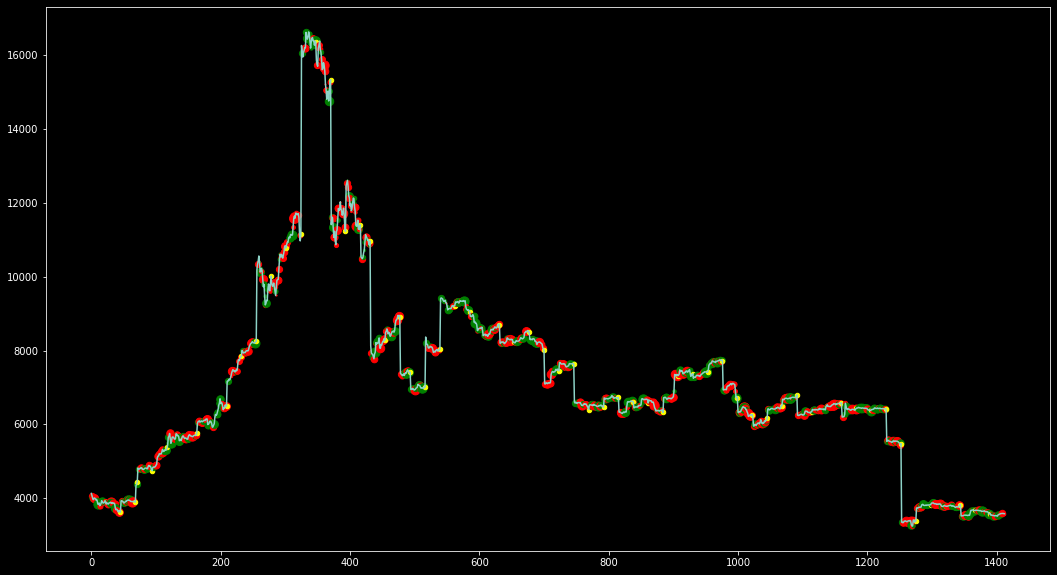

In [17]:
algo.plot()

In [18]:
algo.cash

106767.72815686438

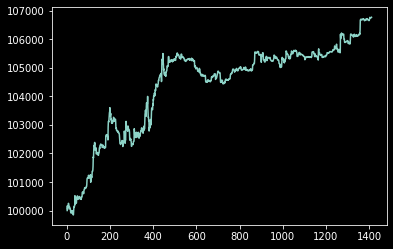

In [19]:
plt.plot(list(algo.metrics['Portfolio Marked']))

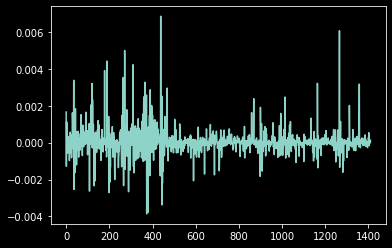

In [20]:
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
plt.plot(returns)

In [21]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

5.767158970086588

In [ ]:
algo.metrics.iloc[100:120]

In [ ]:
x = pd.DataFrame(algo.metrics['Position USD'])

In [ ]:
x = x.dropna()
x[x['Position USD']!=0].index.size

##### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

### Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)